## slow mode decay run

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib as mpl
fs = 16
mpl.rcParams['font.size'] = fs-2
mpl.rcParams['axes.labelsize'] = fs
mpl.rcParams['axes.titlesize'] = fs
mpl.rcParams['xtick.labelsize'] = fs
mpl.rcParams['ytick.labelsize'] = fs
mpl.rcParams['legend.fontsize'] = fs-2

load AGK data from linear run

In [2]:
file_dir = '/Volumes/yuguang_sd/data/agk/lin_response/upar_160929_slow_decay/'
file_1 = file_dir + 'lin_upar_1' + '.heat'
file_2 = file_dir + 'lin_upar_2' + '.heat'
heat_1 = np.loadtxt(file_1)
heat_2 = np.loadtxt(file_2)

In [3]:
t1, Ebperp1, Ebpar1 =heat_1[:, 0], heat_1[:, 2], heat_1[:, 3]
t2, Ebperp2, Ebpar2 =heat_2[:, 0], heat_2[:, 2], heat_2[:, 3]

In [5]:
bi=0.01
ti_te = 1.
kperp_rhoi = 0.2
wbar0 = 0.13
upar0 = 1
mi_me = 1836

text0 = "{0}{1}\n".format(r'$\beta_i$=',bi) + \
    "{0}{1}\n".format(r'$T_i/T_e=$',ti_te) + \
    "{0}{1}\n".format(r'$k_\perp \rho_i=$',kperp_rhoi) + \
    "{0}{1}\n".format(r'$\overline{u}_0=$', upar0) +\
    "{0}{1:.2f}\n".format(r'$\overline{\omega}_0=$', wbar0)

### dispersion

In [6]:
# wr, wi = 0.144, -0.0644
# fitting data come from a matlab module

wr, wi = 0.1251, -0.06177
bi = 0.01
a, off, phi = -0.02619, 0.04434, 0.2926 

In [7]:
t_decay = np.linspace(0, 10, 100)
ebpar_decay = np.array([np.exp(2*wi*tbar) * (off + a * np.cos(wr*tbar+phi)**2) 
                        for tbar in t_decay/np.sqrt(bi)])

In [8]:
text1 = "fit model: {}".format(r"$\left(C + A\cos^2(\overline{\omega}_r \overline{t})\right)e^{2\overline{\omega_i} \overline{t}}$")
text2 = "best fit: {0}={1:.3f}, {2}={3:.3f}".format(r'$\overline{\omega}_r$', wr, 
                                      r'$\overline{\omega}_i$', wi)
text3 = "hot plasma slow  mode:\n {}=0.144-0.064i".format('$\overline{\omega}$')

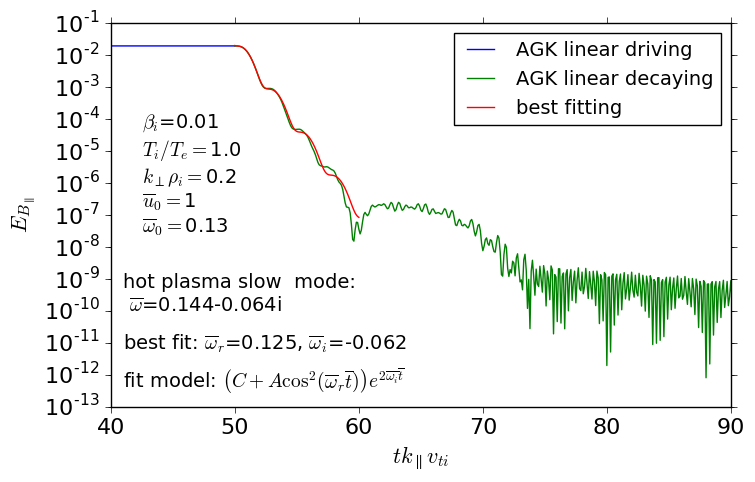

In [9]:
fig_ebpar, ax = plt.subplots(figsize=(8, 8*0.618))
ax.plot(t1, Ebpar1, label = 'AGK linear driving')
ax.plot(t2, Ebpar2, label = 'AGK linear decaying')
ax.set_yscale('log')
ax.set_ylabel('$E_{B_\parallel}$')
ax.set_xlabel('$tk_\parallel v_{ti}$')
ax.set_xlim([40, 90])

ax.plot(t_decay + t1[-1], ebpar_decay,'r', label = 'best fitting')
ax.legend(loc='best')
ax.text(0.02, 0.05, text1, transform=ax.transAxes)
ax.text(0.02, 0.15, text2, transform=ax.transAxes)
ax.text(0.02, 0.25, text3, transform=ax.transAxes)
ax.text(0.05, 0.4, text0, transform=ax.transAxes)
plt.show()
# fig_ebpar.savefig('lin_slow_decay_1.png', dpi=200)

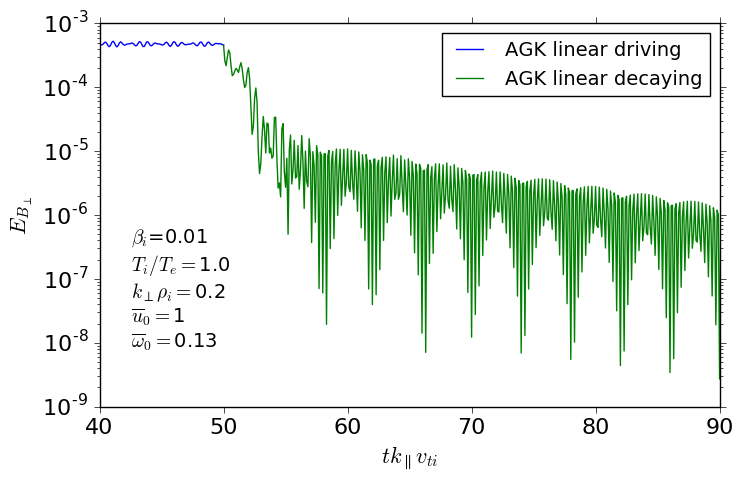

In [12]:
fig_ebperp, ax = plt.subplots(figsize=(8, 8*0.618))
ax.plot(t1, Ebperp1, label = 'AGK linear driving')
ax.plot(t2, Ebperp2, label = 'AGK linear decaying')
ax.set_yscale('log')
ax.set_ylabel('$E_{B_\perp}$')
ax.set_xlabel('$tk_\parallel v_{ti}$')
ax.set_xlim(40, 90)

ax.legend(loc='best')
ax.text(0.05, 0.1, text0, transform=ax.transAxes)
plt.show()
# fig_ebperp.savefig('lin_slow_decay_2.png', dpi=200)

### MVA

In [ ]:
fig_mva, ax = plt.subplots(figsize=(8, 8*0.618))
ax.plot(t1[1:], Ebperp1[1:]/Ebpar1[1:], label = 'AGK linear driving')
ax.plot(t2, Ebperp2/Ebpar2, label = 'AGK linear decaying')
ax.set_yscale('log')
ax.set_xlim(40, 90)
ax.set_ylabel('MVA')
ax.set_xlabel('$tk_\parallel v_{ti}$')
ax.legend(loc='best')
ax.text(0.05, 0.3, text0, transform=ax.transAxes)
# fig_mva.savefig('lin_slow_decay_mva_1.png', dpi=200)
plt.show()

### slow/Alfven mode decay together 

In [ ]:
file_dir = '/Volumes/yuguang_sd/data/agk/lin_response/upar_160929_equal_erg_decay/'
file_1 = file_dir + 'lin_upar_1' + '.heat'
file_2 = file_dir + 'lin_upar_2' + '.heat'
heat_1 = np.loadtxt(file_1)
heat_2 = np.loadtxt(file_2)

t1, Ebperp1, Ebpar1 =heat_1[:, 0], heat_1[:, 2], heat_1[:, 3]
t2, Ebperp2, Ebpar2 =heat_2[:, 0], heat_2[:, 2], heat_2[:, 3]

In [ ]:
bi = 0.01
ti_te = 1.
kperp_rhoi = 0.2
wbar0_s = 0.13
wbar0_a = 0.95
upar0 = 26.2
apar0 = 1
mi_me = 1836

text0 = "{0}{1}\n".format(r'$\beta_i$=',bi) + \
    "{0}{1}\n".format(r'$T_i/T_e=$',ti_te) + \
    "{0}{1}\n".format(r'$k_\perp \rho_i=$',kperp_rhoi) + \
    "{0}{1}\n".format(r'$u_0=$', upar0) +\
    "{0}{1}\n".format(r'$A_0=$', apar0) +\
    "{0}{1}{2:.2f}\n".format('drive slow mode w. ', r'$\overline{\omega}_0=$', wbar0_s) +\
    "{0}{1}{2:.2f}\n".format('drive Alfven mode w. ', r'$\overline{\omega}_0=$', wbar0_a)

In [ ]:
fig_ebpar, ax = plt.subplots(figsize=(8, 8*0.618))
ax.plot(t1, Ebpar1, label = 'AGK linear driving')
ax.plot(t2, Ebpar2, label = 'AGK linear decaying')
ax.set_yscale('log')
ax.set_ylabel('$E_{B_\parallel}$')
ax.set_xlabel('$tk_\parallel v_{ti}$')
ax.set_xlim(380, 450)

ax.legend(loc='best')
ax.text(0.05, 0.1, text0, transform=ax.transAxes)
plt.show()
# fig_ebpar.savefig('mix_Ebpar_decay_1.png', dpi=200)

In [ ]:
fig_ebperp, ax = plt.subplots(figsize=(8, 8*0.618))
ax.plot(t1, Ebperp1, label = 'AGK linear driving')
ax.plot(t2, Ebperp2, label = 'AGK linear decaying')
ax.set_yscale('log')
ax.set_ylabel('$E_{B_\perp}$')
ax.set_xlabel('$tk_\parallel v_{ti}$')
ax.set_xlim(380, 450)

ax.legend(loc='best')
ax.text(0.05, 0.1, text0, transform=ax.transAxes)
plt.show()
# fig_ebperp.savefig('mix_Ebperp_decay_1.png', dpi=200)

In [ ]:
fig_mva, ax = plt.subplots(figsize=(8, 8*0.618))
ax.plot(t1[1:], Ebperp1[1:]/Ebpar1[1:], label = 'AGK linear driving')
ax.plot(t2, Ebperp2/Ebpar2, label = 'AGK linear decaying')
ax.set_yscale('log')
ax.set_xlim(380, 450)
ax.set_ylabel('MVA')
ax.set_xlabel('$tk_\parallel v_{ti}$')
ax.legend(loc='best')
ax.text(0.05, 0.3, text0, transform=ax.transAxes)
# fig_mva.savefig('mix_mva_decay_1.png', dpi=200)
plt.show()

In [ ]:
ls figures/

In [ ]:
mv *.png figures/